# EP fluxes with and without sponge

** include background**




In [1]:
# load modules 

import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
from matplotlib import colors, ticker, cm
from matplotlib.colors import LogNorm
%matplotlib inline
import os 
from xgcm import Grid
from xarrayutils import aggregate
import copy
# Pseudo Inversion 
from scipy.linalg import pinv, eig 

In [2]:
# load time averaged model variables
# without sponge
ds_nosponge= xr.open_dataset('Model_Tav_12_12_18.nc')

In [3]:
# load data with sponge layer
data_dir = '/swot/SUM04/dbalwada/channel_model/05km_sponge/run/'

model_vars = ['uVeltave','vVeltave','wVeltave', 'Ttave', 
             'UTtave', 'VTtave','WTtave','UUtave', 'UVtave',
              'VVtave', 'TTtave']

ds_sponge = open_mdsdataset(data_dir , delta_t=300,  
                          prefix=model_vars,
                          ignore_unknown_vars=True, geometry='cartesian')

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:782: UserWarning: Couldn't find available_diagnostics.log in /swot/SUM04/dbalwada/channel_model/05km_sponge/run/. Using default version.
  "in %s. Using default version." % data_dir)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/utils.py:423: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


In [4]:
ds_sponge = ds_sponge.mean('time').load()

In [5]:
# vars for plotting
X = ds_sponge.XC/1e3
Y = ds_sponge.YC/1e3
Z = ds_sponge.Z

In [7]:
grid = Grid(ds_sponge, periodic='X')

## Mean Flow

In [13]:
spd_nosponge = (grid.interp(ds_nosponge.uVeltave, 'X')**2 + \
                grid.interp(ds_nosponge.vVeltave, 'Y', boundary='extend')**2)**0.5

In [14]:
spd_sponge = (grid.interp(ds_sponge.uVeltave, 'X')**2 + \
                grid.interp(ds_sponge.vVeltave, 'Y', boundary='extend')**2)**0.5

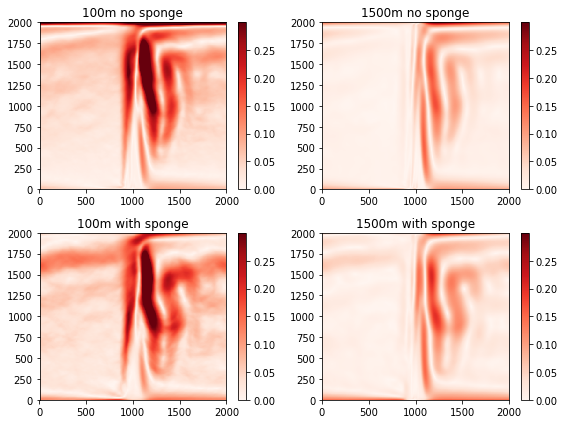

In [15]:
# plot mean speed
fig, ax = plt.subplots(2,2, figsize=(8,6))


im = ax[0,0].pcolormesh(X, Y, spd_nosponge.sel(Z=-100, method='nearest'), vmax=0.3, cmap='Reds') 
ax[0,0].set_title('100m no sponge')
fig.colorbar(im , ax=ax[0,0])

im = ax[0,1].pcolormesh(X, Y, spd_nosponge.sel(Z=-1500, method='nearest'), vmax=0.3, cmap='Reds' ) 
ax[0,1].set_title('1500m no sponge')
fig.colorbar(im, ax=ax[0,1])

im = ax[1,0].pcolormesh(X, Y, spd_sponge.sel(Z=-100, method='nearest'), vmax=0.3, cmap='Reds') 
ax[1,0].set_title('100m with sponge')
fig.colorbar(im , ax=ax[1,0])

im = ax[1,1].pcolormesh(X, Y, spd_sponge.sel(Z=-1500, method='nearest'), vmax=0.3, cmap='Reds' ) 
ax[1,1].set_title('1500m with sponge')
fig.colorbar(im, ax=ax[1,1])


plt.tight_layout()

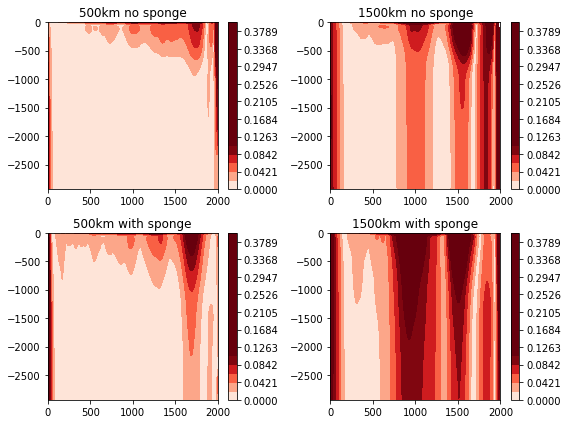

In [19]:
# plot mean speed
fig, ax = plt.subplots(2,2, figsize=(8,6))

levels= np.linspace(0,0.4,20)

im = ax[0,0].contourf( Y, Z, spd_nosponge.sel(XC=500e3, method='nearest'), 
                    levels = levels, vmax=0.1, cmap='Reds') 
ax[0,0].set_title('500km no sponge')
fig.colorbar(im , ax=ax[0,0])

im = ax[0,1].contourf( Y, Z, spd_nosponge.sel(XC=1500e3, method='nearest'), 
                    levels=levels, vmax=0.1, cmap='Reds' ) 
ax[0,1].set_title('1500km no sponge')
fig.colorbar(im, ax=ax[0,1])

im = ax[1,0].contourf( Y, Z, spd_sponge.sel(XC=500e3, method='nearest'), 
                    levels = levels, vmax=0.1, cmap='Reds') 
ax[1,0].set_title('500km with sponge')
fig.colorbar(im , ax=ax[1,0])

im = ax[1,1].contourf( Y, Z, spd_sponge.sel(XC=1500e3, method='nearest'), 
                    levels=levels, vmax=0.1, cmap='Reds' ) 
ax[1,1].set_title('1500km with sponge')
fig.colorbar(im, ax=ax[1,1])

plt.tight_layout()

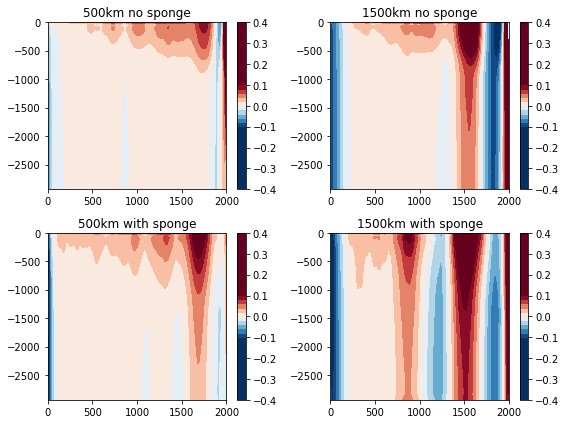

In [23]:
# plot mean speed
fig, ax = plt.subplots(2,2, figsize=(8,6))

levels= np.linspace(-0.4,0.4,41)

im = ax[0,0].contourf( Y, Z, ds_nosponge.uVeltave.sel(XG=500e3, method='nearest'), 
                    levels = levels, vmin=-0.1,vmax=0.1, cmap='RdBu_r') 
ax[0,0].set_title('500km no sponge')
fig.colorbar(im , ax=ax[0,0])

im = ax[0,1].contourf( Y, Z, ds_nosponge.uVeltave.sel(XG=1500e3, method='nearest'), 
                    levels=levels, vmin=-0.1,vmax=0.1, cmap='RdBu_r' ) 
ax[0,1].set_title('1500km no sponge')
fig.colorbar(im, ax=ax[0,1])

im = ax[1,0].contourf( Y, Z, ds_sponge.uVeltave.sel(XG=500e3, method='nearest'), 
                    levels = levels, vmin=-0.1,vmax=0.1, cmap='RdBu_r') 
ax[1,0].set_title('500km with sponge')
fig.colorbar(im , ax=ax[1,0])

im = ax[1,1].contourf( Y, Z, ds_sponge.uVeltave.sel(XG=1500e3, method='nearest'), 
                    levels=levels, vmin=-0.1,vmax=0.1, cmap='RdBu_r' ) 
ax[1,1].set_title('1500km with sponge')
fig.colorbar(im, ax=ax[1,1])

plt.tight_layout()

In [31]:
def eddy_fluxes(ds):
    # 
    eddy_ds = xr.Dataset()
    # 
    eddy_ds['upvp'] = grid.interp(grid.interp(ds.UVtave , 'X'), 'Y', boundary='extend') \
           - grid.interp(ds.uVeltave, 'X')*grid.interp(ds.vVeltave,'Y', boundary='extend')

    eddy_ds['vpvp'] = grid.interp(ds.VVtave, 'Y', boundary='extend')  - grid.interp(ds.vVeltave,'Y', boundary='extend')**2

    eddy_ds['upup'] = grid.interp(ds.UUtave, 'X') - grid.interp(ds.uVeltave, 'X')**2

    eddy_ds['uptp'] = grid.interp(ds.UTtave, 'X') - grid.interp(ds.uVeltave, 'X')*ds.Ttave
    eddy_ds['vptp'] = grid.interp(ds.VTtave, 'Y', boundary='extend') - grid.interp(ds.vVeltave,'Y', boundary='extend')*ds.Ttave

    eddy_ds['tptp'] = ds.TTtave - ds.Ttave**2

    # b = g alpha T 
    g= 9.81
    alpha = 2e-4 

    eddy_ds['upbp'] = g*alpha*eddy_ds['uptp']
    eddy_ds['vpbp'] = g*alpha*eddy_ds['vptp']
    eddy_ds['bpbp'] = (g*alpha)**2*eddy_ds['tptp']
    
    return eddy_ds

In [32]:
eddy_nosponge = eddy_fluxes(ds_nosponge)

In [33]:
eddy_sponge = eddy_fluxes(ds_sponge)

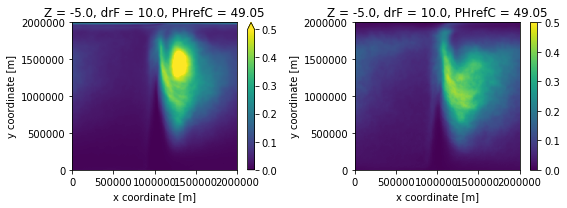

In [38]:
# EKE Surface
plt.figure(figsize=(8,3))
plt.subplot(121)
(eddy_nosponge.upup + eddy_nosponge.vpvp).sel(Z=0, method='nearest').plot(vmax=0.5)

plt.subplot(122)
(eddy_sponge.upup + eddy_sponge.vpvp).sel(Z=0, method='nearest').plot(vmax=0.5)

plt.tight_layout()

In [40]:
g= 9.81
alpha = 2e-4 
ds_nosponge['N2'] = -grid.interp(grid.diff(ds_nosponge.Ttave, 'Z', boundary='extend'), 
                 'Z', boundary='extend')/ds_nosponge.drF*g*alpha

ds_sponge['N2'] = -grid.interp(grid.diff(ds_sponge.Ttave, 'Z', boundary='extend'), 
                 'Z', boundary='extend')/ds_sponge.drF*g*alpha

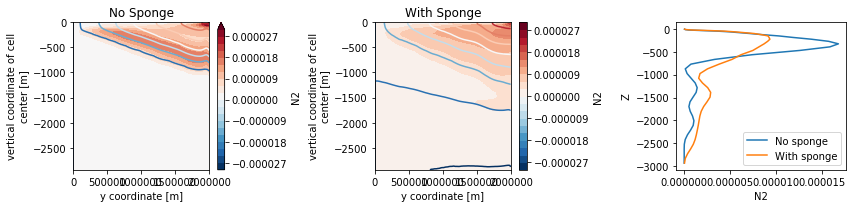

In [53]:
# N2 section 

plt.figure(figsize=(12,3))

plt.subplot(131)
ds_nosponge.N2.sel(XC=0, method='nearest').plot.contourf(vmin=-3e-5, levels=21)
ds_nosponge.Ttave.sel(XC=0, method='nearest').plot.contour(levels=np.linspace(0,8,9), cmap='RdBu_r')
plt.title('No Sponge')

plt.subplot(132)
ds_sponge.N2.sel(XC=0, method='nearest').plot.contourf(vmin=-3e-5, levels=21)
ds_sponge.Ttave.sel(XC=0, method='nearest').plot.contour(levels=np.linspace(0,8,9))
plt.title('With Sponge')

plt.subplot(133)
plt.plot(ds_nosponge.N2.sel(XC=0, YC=1000e3, method='nearest'), ds_nosponge.Z, label='No sponge')
plt.plot(ds_sponge.N2.sel(XC=0, YC=1000e3, method='nearest'), ds_nosponge.Z, label='With sponge')
plt.xlabel('N2')
plt.ylabel('Z')
plt.legend()

plt.tight_layout()

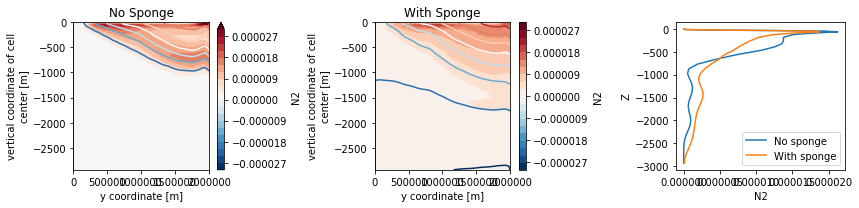

In [54]:
# N2 section 

plt.figure(figsize=(12,3))

plt.subplot(131)
ds_nosponge.N2.sel(XC=1200e3, method='nearest').plot.contourf(vmin=-3e-5, levels=21)
ds_nosponge.Ttave.sel(XC=1200e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), cmap='RdBu_r')
plt.title('No Sponge')

plt.subplot(132)
ds_sponge.N2.sel(XC=1200e3, method='nearest').plot.contourf(vmin=-3e-5, levels=21)
ds_sponge.Ttave.sel(XC=1200e3, method='nearest').plot.contour(levels=np.linspace(0,8,9))
plt.title('With Sponge')

plt.subplot(133)
plt.plot(ds_nosponge.N2.sel(XC=1200e3, YC=1000e3, method='nearest'), ds_nosponge.Z, label='No sponge')
plt.plot(ds_sponge.N2.sel(XC=1200e3, YC=1000e3, method='nearest'), ds_nosponge.Z, label='With sponge')
plt.xlabel('N2')
plt.ylabel('Z')
plt.legend()

plt.tight_layout()

## QG PV Gradients

$$Q_x = - f \frac{d S^X}{dz}$$
$$Q_y = \beta - f \frac{d S^Y}{dz}$$

where 
$S^X = -B_X / B_Z$,
$S^Y = -B_Y / B_Z$


In [61]:
dx = 5e3

ds_nosponge['B_X'] = g*alpha*grid.interp(grid.diff(ds_nosponge.Ttave, 'X'), 'X')/dx
ds_nosponge['B_Y'] = g*alpha*grid.interp(grid.diff(ds_nosponge.Ttave, 'Y', boundary='extend'), 'Y', boundary='extend')/dx

ds_sponge['B_X'] = g*alpha*grid.interp(grid.diff(ds_sponge.Ttave, 'X'), 'X')/dx
ds_sponge['B_Y'] = g*alpha*grid.interp(grid.diff(ds_sponge.Ttave, 'Y', boundary='extend'), 'Y', boundary='extend')/dx

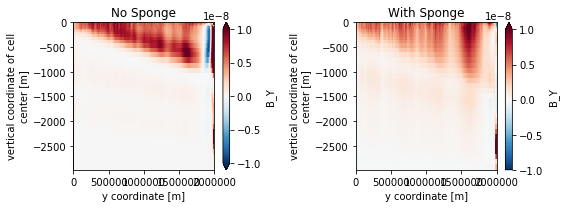

In [65]:
plt.figure(figsize=(8,3))

plt.subplot(121)
ds_nosponge['B_Y'].sel(XC=0, method='nearest').plot(vmin=-1e-8)
plt.title('No Sponge')

plt.subplot(122)
ds_sponge['B_Y'].sel(XC=0, method='nearest').plot(vmin=-1e-8)
plt.title('With Sponge')

plt.tight_layout()

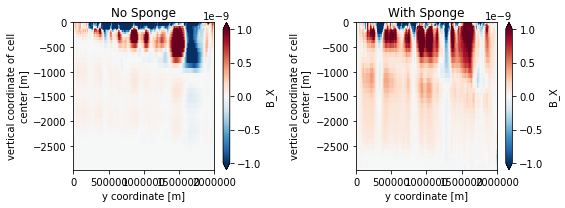

In [67]:
plt.figure(figsize=(8,3))

plt.subplot(121)
ds_nosponge['B_X'].sel(XC=0, method='nearest').plot(vmin=-1e-9)
plt.title('No Sponge')

plt.subplot(122)
ds_sponge['B_X'].sel(XC=0, method='nearest').plot(vmin=-1e-9)
plt.title('With Sponge')

plt.tight_layout()

In [68]:
ds_nosponge['Sx'] = - ds_nosponge['B_X']/ds_nosponge['N2']
ds_nosponge['Sy'] = - ds_nosponge['B_Y']/ds_nosponge['N2']

ds_sponge['Sx'] = - ds_sponge['B_X']/ds_sponge['N2']
ds_sponge['Sy'] = - ds_sponge['B_Y']/ds_sponge['N2']

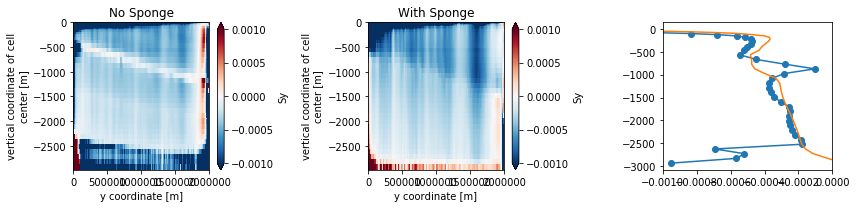

In [103]:
plt.figure(figsize=(12, 3))


plt.subplot(131)
ds_nosponge['Sy'].sel(XC=0, method='nearest').plot(vmin=-1e-3)
plt.title('No Sponge')

plt.subplot(132)
ds_sponge['Sy'].sel(XC=0, method='nearest').plot(vmin=-1e-3)
plt.title('With Sponge')

plt.subplot(133)
plt.plot(ds_nosponge['Sy'].sel(XC=0, YC=1000e3, method='nearest'), ds_sponge.Z, 'o-')
plt.plot(ds_sponge['Sy'].sel(XC=0, YC=1000e3, method='nearest'), ds_sponge.Z)
plt.xlim([-0.001,0])

plt.tight_layout()

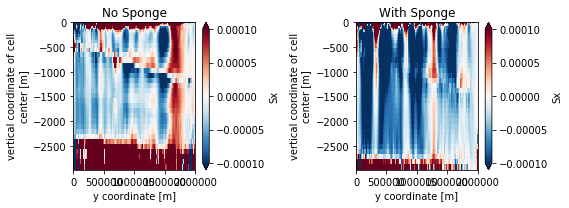

In [71]:
plt.figure(figsize=(8, 3))


plt.subplot(121)
ds_nosponge['Sx'].sel(XC=0, method='nearest').plot(vmin=-1e-4)
plt.title('No Sponge')

plt.subplot(122)
ds_sponge['Sx'].sel(XC=0, method='nearest').plot(vmin=-1e-4)
plt.title('With Sponge')

plt.tight_layout()

In [74]:
f0 = -1.1e-4
beta = 1.4e-11
f = f0 + beta*ds_nosponge.YC

In [94]:
ds_nosponge['Q_Y'] = beta -  ( - grid.interp(grid.diff(ds_nosponge['Sy'], 'Z', boundary='extend')
                                             , 'Z', boundary='extend')/ds_nosponge.drF)*f
ds_nosponge['Q_X'] =  -  ( - grid.interp(grid.diff(ds_nosponge['Sx'], 'Z', boundary='extend')
                                             , 'Z', boundary='extend')/ds_nosponge.drF)*f

ds_sponge['Q_Y'] = beta -  ( - grid.interp(grid.diff(ds_sponge['Sy'], 'Z', boundary='extend')
                                             , 'Z', boundary='extend')/ds_nosponge.drF)*f
ds_sponge['Q_X'] =  -  ( - grid.interp(grid.diff(ds_sponge['Sx'], 'Z', boundary='extend')
                                             , 'Z', boundary='extend')/ds_nosponge.drF)*f

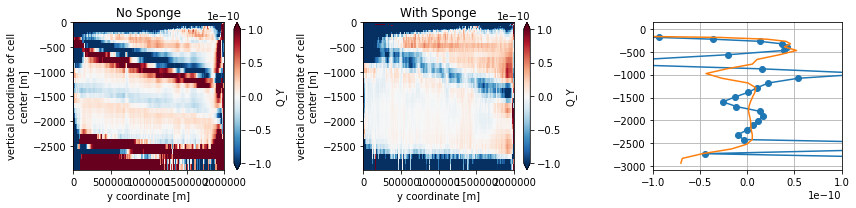

In [111]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
ds_nosponge['Q_Y'].sel(XC=0, method='nearest').plot(vmin = -1e-10)
plt.title('No Sponge')

plt.subplot(132)
ds_sponge['Q_Y'].sel(XC=0, method='nearest').plot(vmin = -1e-10)
plt.title('With Sponge')

plt.subplot(133)
plt.plot(ds_nosponge['Q_Y'].sel(XC=0, YC=1000e3, method='nearest'), ds_sponge.Z, 'o-')
plt.plot(ds_sponge['Q_Y'].sel(XC=0, YC=1000e3, method='nearest'), ds_sponge.Z)
plt.xlim([-1e-10, 1e-10])
plt.grid()

plt.tight_layout()

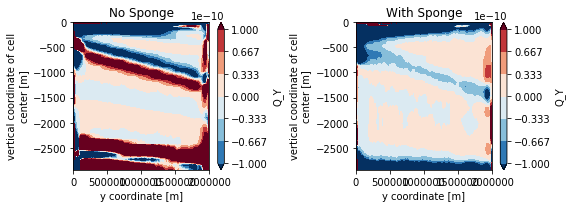

In [98]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
ds_nosponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)
plt.title('No Sponge')

plt.subplot(122)
ds_sponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)
plt.title('With Sponge')

plt.tight_layout()


## PV Fluxes

\begin{equation}
\mathbf{E}_1 = (\overline{u'v'}) \mathbf{i} + 
\frac{1}{2} \left(\overline{v'^2 - u'^2 +\frac{b'^2}{N^2}} \right) \mathbf{j} + 
\left(\frac{f_o}{N^2} \overline{u'b'} \right) \mathbf{k}
\end{equation}

\begin{equation}
\mathbf{E}_2 =  \frac{1}{2} \left(\overline{v'^2 - u'^2 -\frac{b'^2}{N^2}} \right) \mathbf{i} 
-(\overline{u'v'}) \mathbf{j} +
\left(\frac{f_o}{N^2} \overline{v'b'} \right) \mathbf{k}
\end{equation}
The horizontal PV fluxes are given by the divergences 

\begin{equation}
\overline{u'q'} = \nabla. \mathbf{E}_1
\end{equation}

\begin{equation}
\overline{v'q'} = \nabla. \mathbf{E}_2
\end{equation}


In [118]:
def ep_fluxes(ds_eddy, ds): 
    
    EP_flux = xr.Dataset()
    
    EP_flux['E1i'] = ds_eddy.upvp
    EP_flux['E1j'] = 0.5*(ds_eddy.vpvp - ds_eddy.upup + ds_eddy.bpbp/ds.N2)
    EP_flux['E1k'] = ds_eddy.upbp*f/ds.N2
    
    EP_flux['E2i'] = 0.5*(ds_eddy.vpvp - ds_eddy.upup - ds_eddy.bpbp/ds.N2)
    EP_flux['E2j'] = -ds_eddy.upvp
    EP_flux['E2k'] = ds_eddy.vpbp*f/ds.N2
    
    return EP_flux

In [129]:
def pv_fluxes(ds):
    # QG PV flux, so no vertical part
    
    PV_flux = xr.Dataset()
    
    PV_flux['upqp'] = grid.interp(grid.diff(ds.E1i, 'X') , 'X')/dx \
                    + grid.interp(grid.diff(ds.E1j, 'Y', boundary='extend'),'Y',boundary='extend')/dx \
                    - grid.interp(grid.diff(ds.E1k, 'Z', boundary='extend'),'Z', boundary='extend')/ds.drF
    
    PV_flux['vpqp'] = grid.interp(grid.diff(ds.E2i, 'X') , 'X')/dx \
                    + grid.interp(grid.diff(ds.E2j, 'Y', boundary='extend'),'Y',boundary='extend')/dx \
                    - grid.interp(grid.diff(ds.E2k, 'Z', boundary='extend'),'Z', boundary='extend')/ds.drF
    return PV_flux

In [130]:
EP_flux_nosponge = ep_fluxes(eddy_nosponge, ds_nosponge)
EP_flux_sponge = ep_fluxes(eddy_sponge, ds_sponge)

In [131]:
PV_flux_nosponge = pv_fluxes(EP_flux_nosponge)
PV_flux_sponge = pv_fluxes(EP_flux_sponge)

/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xgcm/grid.py:997: RuntimeWarning: invalid value encountered in add
  return 0.5*(data_left + data_right)
/home/dbalwada/.conda/envs/pangeo/lib/python3.6/site-packages/xgcm/grid.py:1001: RuntimeWarning: invalid value encountered in subtract
  return data_right - data_left


In [132]:
PV_flux_sponge

<xarray.Dataset>
Dimensions:  (XC: 400, YC: 400, Z: 40)
Coordinates:
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 ... -2624.5 -2727.5 -2830.5 -2933.5
  * YC       (YC) >f4 2500.0 7500.0 12500.0 ... 1987500.0 1992500.0 1997500.0
  * XC       (XC) >f4 2500.0 7500.0 12500.0 ... 1987500.0 1992500.0 1997500.0
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 ... 103.0 103.0 103.0 103.0 103.0
    PHrefC   (Z) >f4 49.05 147.15 245.25 ... 26756.775 27767.205 28777.635
Data variables:
    upqp     (Z, YC, XC) float32 nan nan nan ... -9.724897e-07 -1.0066668e-06
    vpqp     (Z, YC, XC) float32 nan nan nan ... -1.738739e-07 -1.7901331e-07

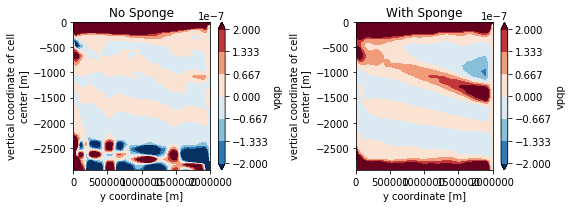

In [137]:
plt.figure(figsize=(8, 3))

plt.subplot(121)
PV_flux_nosponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -2e-7)
plt.title('No Sponge')

plt.subplot(122)
PV_flux_sponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -2e-7)
plt.title('With Sponge')

plt.tight_layout()

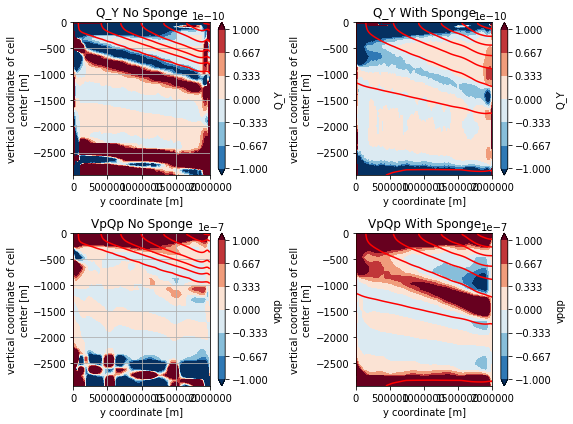

In [470]:
# Key plot

plt.figure(figsize=(8, 6))

plt.subplot(221)
ds_nosponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)
ds_nosponge['Ttave'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y No Sponge')
plt.grid()

plt.subplot(222)
ds_sponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)
ds_sponge['Ttave'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y With Sponge')

plt.subplot(223)
PV_flux_nosponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-7)
ds_nosponge['Ttave'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp No Sponge')
plt.grid()

plt.subplot(224)
PV_flux_sponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-7)
ds_sponge['Ttave'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp With Sponge')
plt.tight_layout()

# With a sponge layer, the PV gradients and PV fluxes look qualitatively similar.
# However, without a sponge layer, the PV gradient estimated offline shows large +/-ve spikes, 
# which do no appear in the fluxes. 
# (suggests that some smoothing on the T field might be in order before taking gradeints.)

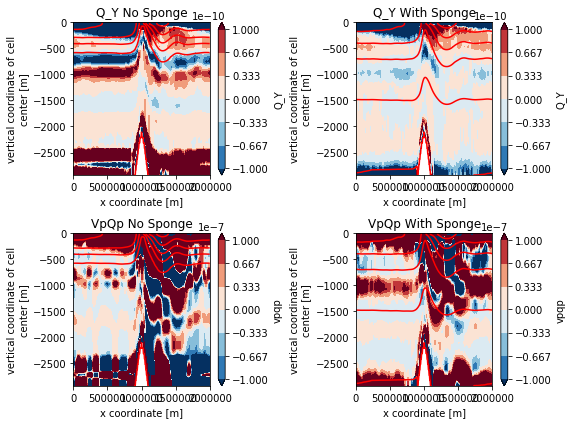

In [146]:
# Key plot

plt.figure(figsize=(8, 6))

plt.subplot(221)
ds_nosponge['Q_Y'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-10)
ds_nosponge['Ttave'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y No Sponge')

plt.subplot(222)
ds_sponge['Q_Y'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-10)
ds_sponge['Ttave'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y With Sponge')

plt.subplot(223)
PV_flux_nosponge['vpqp'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-7)
ds_nosponge['Ttave'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp No Sponge')

plt.subplot(224)
PV_flux_sponge['vpqp'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-7)
ds_sponge['Ttave'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp With Sponge')
plt.tight_layout()

# With a sponge layer, the PV gradients and PV fluxes look qualitatively similar.
# However, without a sponge layer, the PV gradient estimated offline shows large +/-ve spikes, 
# which do no appear in the fluxes. 
# (suggests that some smoothing on the T field might be in order before taking gradeints.)

# PV gradients with finer Z grid

In [354]:
from scipy.interpolate import interp2d
from xgcm import generate_grid_ds

In [454]:
def interp_temp(ds): 
    Z = ds.Z.values
    YC = ds.YC.values
    XC = ds.XC.values

    Zf = np.linspace(Z[0], Z[-1], 1000)
    
    nx = XC.shape[0]
    ny = YC.shape[0]
    
    new_temp = np.zeros([1000, ny, nx ])
    
    for i in range(0, nx): 
        Tsec = ds.Ttave.isel(XC=i).values
        TintF = interp2d(YC, -Z, Tsec, kind='cubic')
        Tsecint = TintF(YC, -Zf)
        new_temp[:,:,i] = Tsecint
        
    Txr = xr.DataArray(new_temp, dims=['Zf', 'YC', 'XC'], 
                   coords={'Zf':Zf, 'YC':YC,'XC':XC}).to_dataset(name='T')
    
    temp = generate_grid_ds(Txr, {'X':'XC', 'Y':'YC', 'Z':'Zf'})
    
    return temp

In [455]:
Tint_sponge = interp_temp(ds_sponge)
Tint_nosponge = interp_temp(ds_nosponge)

In [443]:
def PV_grads_fine(ds):
    gridf = Grid(ds, periodic='X')
    
    ds['N2'] = g*alpha*gridf.interp(gridf.diff(ds['T'], 'Z', boundary='extend')
                                 / gridf.diff(ds.Zf,'Z',boundary='extend'), 
                                 'Z', boundary='extend')
    ds['B_X'] = g*alpha*gridf.interp(gridf.diff(ds['T'], 'X')/ dx, 'X')
    ds['B_Y'] = g*alpha*gridf.interp(gridf.diff(ds['T'], 'Y', boundary='extend')
                                          / dx, 'Y', boundary='extend')
    
    ds['Sx'] = - ds['B_X'] / ds['N2']
    ds['Sy'] = - ds['B_Y'] / ds['N2']
    
    ds['Q_Y'] = beta -  gridf.interp(gridf.diff(ds['Sy'], 'Z', boundary='extend')/
                                              gridf.diff(ds.Zf, 'Z', boundary='extend')
                                             , 'Z', boundary='extend')*f
    ds['Q_X'] =  -  gridf.interp(gridf.diff(ds['Sx'], 'Z', boundary='extend')/
                                              gridf.diff(ds.Zf, 'Z', boundary='extend')
                                             , 'Z', boundary='extend')*f
    
    return ds

In [458]:
Tint_sponge = PV_grads_fine(Tint_sponge)

In [459]:
Tint_nosponge = PV_grads_fine(Tint_nosponge)

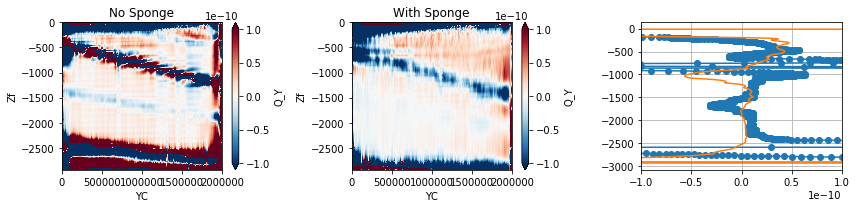

In [460]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
Tint_nosponge['Q_Y'].sel(XC=0, method='nearest').plot(vmin = -1e-10)
plt.title('No Sponge')

plt.subplot(132)
Tint_sponge['Q_Y'].sel(XC=0, method='nearest').plot(vmin = -1e-10)
plt.title('With Sponge')

plt.subplot(133)
plt.plot(Tint_nosponge['Q_Y'].sel(XC=0, YC=1000e3, method='nearest'), Tint_sponge.Zf, 'o-')
plt.plot(Tint_sponge['Q_Y'].sel(XC=0, YC=1000e3, method='nearest'), Tint_sponge.Zf)
plt.xlim([-1e-10, 1e-10])
plt.grid()

plt.tight_layout()

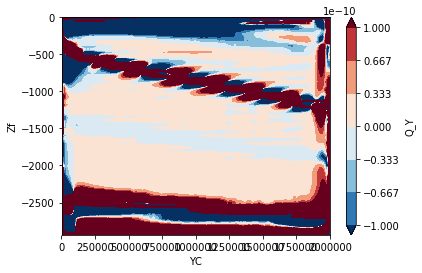

In [469]:
Tint_nosponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)

(-5e-10, 5e-10)

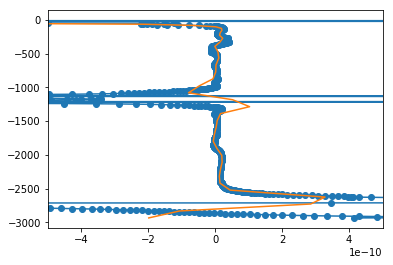

In [479]:
plt.plot(Tint_nosponge['Q_Y'].sel(XC=0, YC=1800e3, method='nearest'), Tint_sponge.Zf, 'o-')
plt.plot(ds_nosponge['Q_Y'].sel(XC=0, YC=1800e3, method='nearest'), ds_nosponge.Z)
plt.xlim([-5e-10, 5e-10])


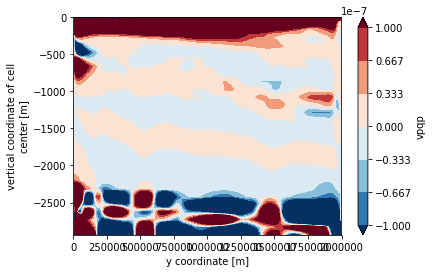

In [468]:
PV_flux_nosponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-7)

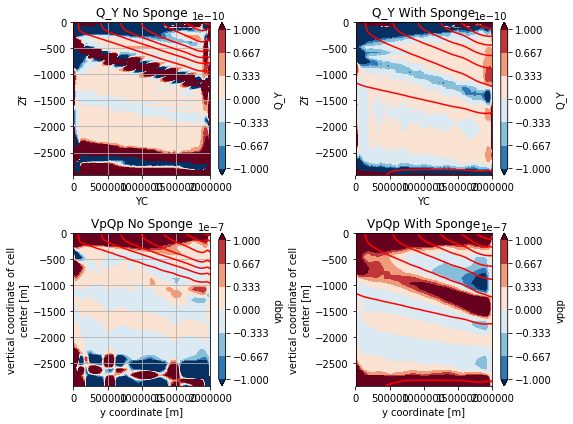

In [471]:
# Key plot

plt.figure(figsize=(8, 6))

plt.subplot(221)
Tint_nosponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)
Tint_nosponge['T'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y No Sponge')
plt.grid()

plt.subplot(222)
Tint_sponge['Q_Y'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-10)
Tint_sponge['T'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y With Sponge')

plt.subplot(223)
PV_flux_nosponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-7)
ds_nosponge['Ttave'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp No Sponge')
plt.grid()

plt.subplot(224)
PV_flux_sponge['vpqp'].sel(XC=slice(0,800e3)).mean('XC').plot.contourf(vmin = -1e-7)
ds_sponge['Ttave'].sel(XC=slice(0,800e3)).mean('XC').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp With Sponge')
plt.tight_layout()

# With a sponge layer, the PV gradients and PV fluxes look qualitatively similar.
# However, without a sponge layer, the PV gradient estimated offline shows large +/-ve spikes, 
# which do no appear in the fluxes. 
# (suggests that some smoothing on the T field might be in order before taking gradeints.)

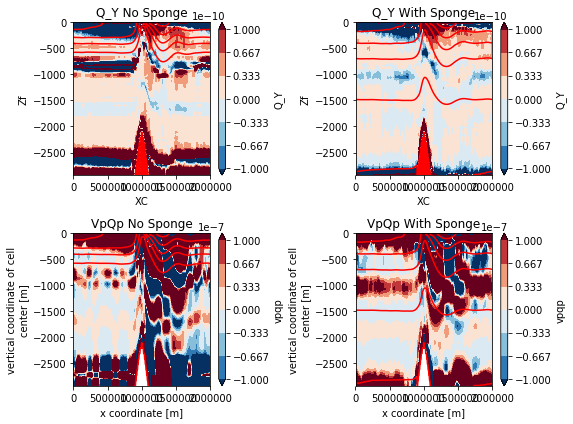

In [463]:
# Key plot

plt.figure(figsize=(8, 6))

plt.subplot(221)
Tint_nosponge['Q_Y'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-10)
Tint_nosponge['T'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y No Sponge')

plt.subplot(222)
Tint_sponge['Q_Y'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-10)
Tint_sponge['T'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('Q_Y With Sponge')

plt.subplot(223)
PV_flux_nosponge['vpqp'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-7)
ds_nosponge['Ttave'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp No Sponge')

plt.subplot(224)
PV_flux_sponge['vpqp'].sel(YC=1000e3, method='nearest').plot.contourf(vmin = -1e-7)
ds_sponge['Ttave'].sel(YC=1000e3, method='nearest').plot.contour(levels=np.linspace(0,8,9), colors='r')
plt.title('VpQp With Sponge')
plt.tight_layout()

# With a sponge layer, the PV gradients and PV fluxes look qualitatively similar.
# However, without a sponge layer, the PV gradient estimated offline shows large +/-ve spikes, 
# which do no appear in the fluxes. 
# (suggests that some smoothing on the T field might be in order before taking gradeints.)

# Modal averaging

In [3]:
from oceanmodes import baroclinic

In [5]:
grid = Grid(ds_nosponge, periodic='X')

In [16]:
N2 = grid.interp(-grid.diff(ds_nosponge.Ttave,'Z', boundary='extend')
                 ,'Z', boundary='extend')/  ds_nosponge.drF

In [17]:
N2

<xarray.DataArray (Z: 40, YC: 400, XC: 400)>
array([[[-0.000000e+00, -0.000000e+00, ..., -0.000000e+00, -0.000000e+00],
        [-1.357198e-05, -1.370907e-05, ..., -1.351833e-05, -1.347661e-05],
        ...,
        [ 4.705191e-03,  4.695678e-03, ...,  4.718256e-03,  4.710579e-03],
        [ 8.432913e-03,  8.418393e-03, ...,  8.462834e-03,  8.444953e-03]],

       [[-0.000000e+00, -0.000000e+00, ..., -0.000000e+00, -0.000000e+00],
        [-1.202524e-05, -1.235902e-05, ..., -1.140833e-05, -1.176000e-05],
        ...,
        [ 1.040633e-02,  1.038330e-02, ...,  1.044722e-02,  1.042435e-02],
        [ 1.617932e-02,  1.614993e-02, ...,  1.624114e-02,  1.620791e-02]],

       ...,

       [[-0.000000e+00, -0.000000e+00, ..., -0.000000e+00, -0.000000e+00],
        [ 1.560282e-07,  1.496988e-07, ...,  1.672402e-07,  1.621406e-07],
        ...,
        [ 8.431200e-06,  8.401397e-06, ...,  8.447801e-06,  8.467658e-06],
        [ 2.009205e-05,  2.005497e-05, ...,  2.032522e-05,  2.019776e-05]]

In [23]:
Profile = N2.sel(XC=0, YC=1000e3, method='nearest').data
Z = -N2.Z.data

In [24]:
f0= -1.1e-4

In [25]:
zphi, Rd, vd = baroclinic.neutral_modes_from_N2_profile(Z, 
                                                                          Profile, f0)

In [29]:
vd.shape

(41, 6)

In [30]:
zphi.shape

(41,)

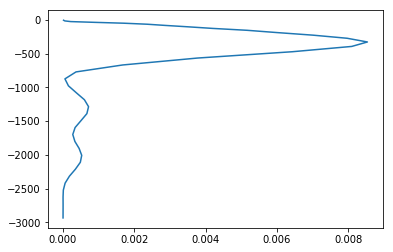

In [36]:
plt.plot(Profile, -Z)

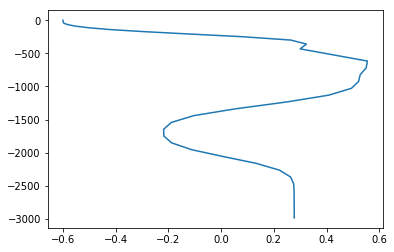

In [37]:
plt.plot(np.sum(vd, axis=1), -zphi)